In [2]:
import os
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random


The chosen federations used in the completion of this assignment are the EPF (European Powerlifting Federation) and the NZPF (New Zealand Powerlifting Federation). 

All the federations can be found in the 'meet-data' folder of the dataset. Within each federation there are a three csv files. Namely, entries.csv, meet.csv and original.csv. The exact details of each competition; the date, location and name of the meet are stored in the meet.csv file. The crucial and used information is stored in the entries.csv file. 

The cell below extracts all the entries.csv files from each meet within the EPF federation and combines them into one csv file.

In [2]:
csv_paths = []

#Adding all the paths for all the lifting info from the entries.csv file from every meet within the federation
for root, dirs, files in os.walk('C:/Users/DELL/OneDrive/Desktop/DVE/Assignment 1/epf'):
    for file in files:
        if file == 'entries.csv':
            csv_paths.append(os.path.join(root, file))

dataframes = []

#Reading in each csv file and converting it to a pandas dataframe
for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    dataframes.append(df)

#Combining all dataframes into one dataframe
#Therefore, combining all lifting data from every meet in the EPF into one dataframe
combined_df = pd.concat(dataframes, ignore_index=True)
#convertng the combined dataframe into a csv file
combined_df.to_csv('epf_combined_data.csv', index=False)


The cell below is accomplishing the same as above but now for the NZPF. Combining all the lifting information for every lifter for every meet in the federation.

In [3]:
#Doing the same as above but now for the NZPF
csv_paths_nz = []


#Adding all the paths for all the lifting info from the entries.csv file from every meet
for root, dirs, files in os.walk('C:/Users/DELL/OneDrive/Desktop/DVE/Assignment 1/nzpf'):
    for file in files:
        if file == 'entries.csv':
            csv_paths.append(os.path.join(root, file))

dataframes_nz = []

#Reading in each csv file and converting to a pandas dataframe
for csv_path_nz in csv_paths_nz:
    df = pd.read_csv(csv_path_nz)
    dataframes_nz.append(df)

#Combining all dataframes into one dataframe
#Combining all lifting data from every meet in the EPF
combined_df_nz = pd.concat(dataframes, ignore_index=True)

#Converting to a csv file
combined_df_nz.to_csv('nzpf_combined_data.csv', index=False)

The cell below now combines each fedeartions combined lifting data into one dataframe and then one csv file.

In [4]:
dataframes_total = []

#Read in each federations csv file and convert to a pandas dataframe
df_epf = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/DVE/Assignment 1/epf_combined_data.csv")
df_nzpf = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/DVE/Assignment 1/nzpf_combined_data.csv")

#Add to list of dataframes
dataframes_total.append(df_nzpf)
dataframes_total.append(df_epf)

#Combine the two dataframes into one
#This dataframe contains all meet data from both federations
combined_total = pd.concat(dataframes_total, ignore_index=True)

#Convert the dataframe inot a csv file
combined_total.to_csv('full_dataset.csv', index=False)


### Data Exploration
Below are some graphs that provide insight into the dataset

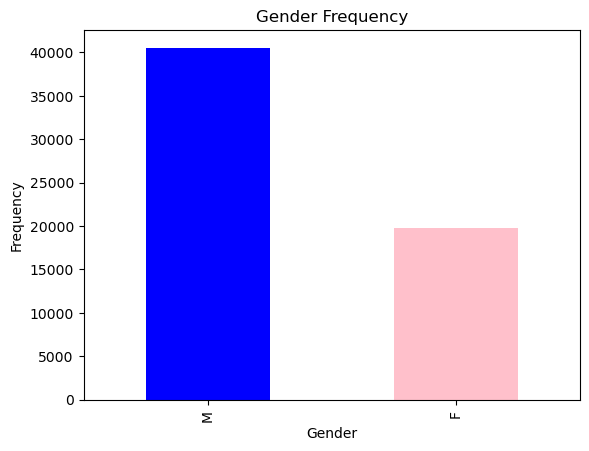

In [3]:
df_graphs = pd.read_csv('./full_dataset.csv')
gender_counts = df_graphs['Sex'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])  
plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

As can be seen from the above graph the number of male powerlifters heavily outweigh the number of female powerlifters.

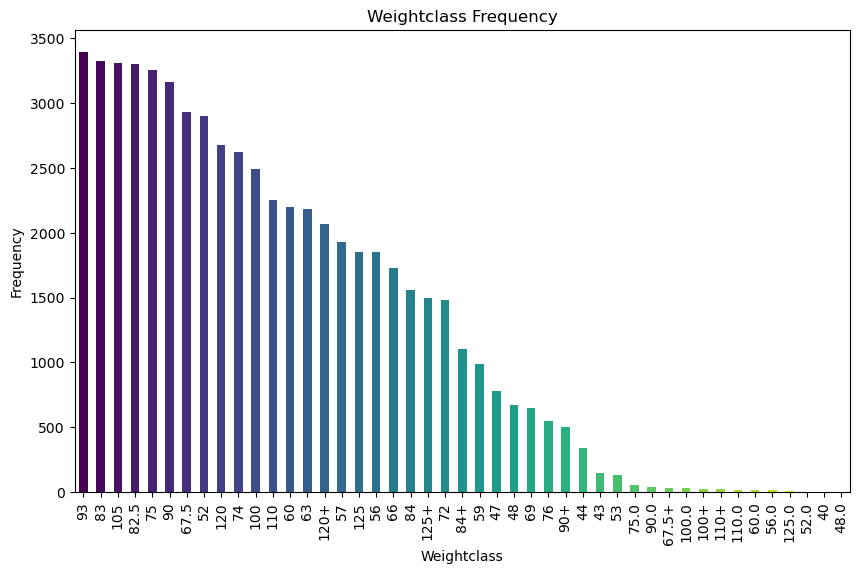

In [16]:
weight_class = df_graphs['WeightClassKg'].value_counts()

colours = plt.cm.viridis(np.linspace(0, 1, len(weight_class)))
fig = plt.figure(figsize =(10,6))
weight_class.plot(kind='bar',color=colours)
plt.title('Weightclass Frequency')
plt.xlabel('Weightclass')
plt.ylabel('Frequency')
plt.show()


The graph above shows the frequency, per unique weight class, within the dataset. As can be seen, the weightclass with the most number of powerlifters is 93, followed closely by 83, 105,82.5 and 75. The frequency then begins to drop off after that. Therefore the range for the most popular weightclasses is between 75 and 105.

The cell below calculates the percentagee of completed lifts for each attempt across the three lifts. The third and final lift will most likely be the heaviest attempt for each lifter, as its their last attempt to complete a lift for either one of the three lifts, and the first attempt will most likely be the lightest as the opening lift will always be an achieveable lift. Due to this the number of successful attempts on the third lift, for each lift, should be lower than the number of successful lifts on the first lift. The cell below illustrates this by comparing the percentage of successful attempts for the first and last lift for the Squat, Bench press and Deadlift. 

It can then be seen in the results table that this is true. For all lifts, the percentage of successful attempts for the third lift is always much lower and even half of the number of successful attempts for lift 1 in some cases.

(0.0, 1.0, 0.0, 1.0)

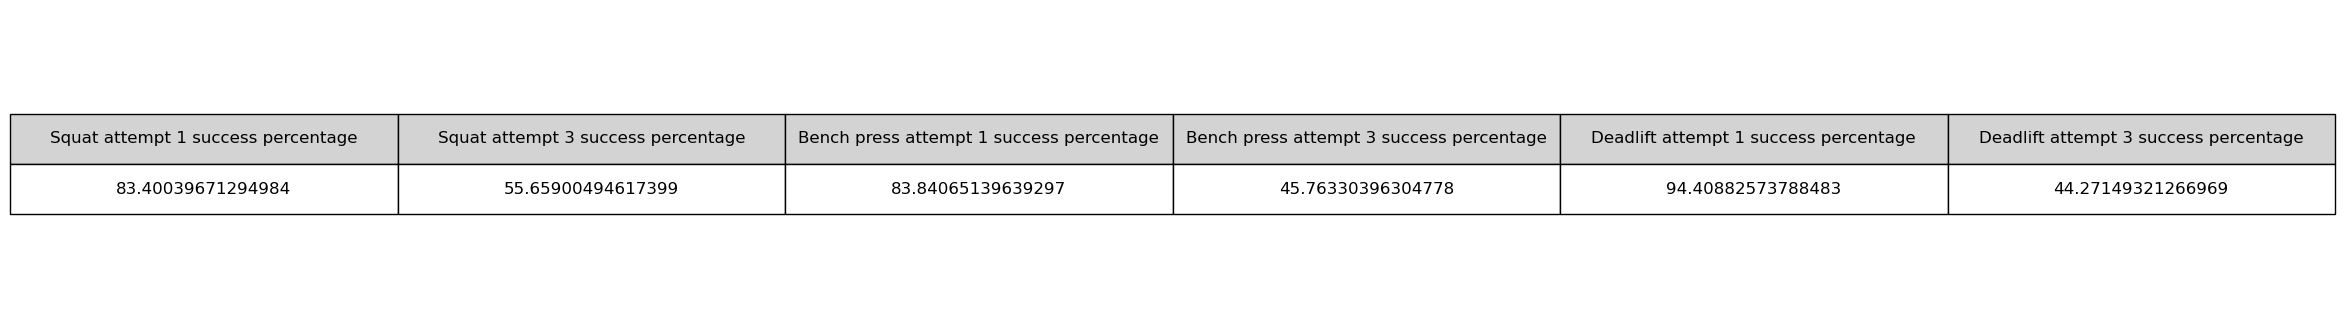

In [9]:
total_squat_1_values = df_graphs['Squat1Kg'].count()
negative_values_squat_1 = df_graphs[df_graphs['Squat1Kg'] < 0]['Squat1Kg'].count()

total_squat_3_values = df_graphs['Squat3Kg'].count()
negative_values_squat_3 = df_graphs[df_graphs['Squat3Kg'] < 0]['Squat3Kg'].count()

squat_1_percentage = 100 - ((negative_values_squat_1 / total_squat_1_values) * 100)
squat_3_percentage = 100 - ((negative_values_squat_3 / total_squat_3_values) * 100)

total_bench_1_values = df_graphs['Bench1Kg'].count()
negative_values_bench_1 = df_graphs[df_graphs['Bench1Kg'] < 0]['Bench1Kg'].count()

total_bench_3_values = df_graphs['Bench3Kg'].count()
negative_values_bench_3 = df_graphs[df_graphs['Bench3Kg'] < 0]['Bench3Kg'].count()

bench_1_percentage = 100 - ((negative_values_bench_1 / total_bench_1_values) * 100)
bench_3_percentage = 100 - ((negative_values_bench_3 / total_bench_3_values) * 100)

total_Deadlift_1_values = df_graphs['Deadlift1Kg'].count()
negative_values_Deadlift_1 = df_graphs[df_graphs['Deadlift1Kg'] < 0]['Deadlift1Kg'].count()

total_Deadlift_3_values = df_graphs['Deadlift3Kg'].count()
negative_values_Deadlift_3 = df_graphs[df_graphs['Deadlift3Kg'] < 0]['Deadlift3Kg'].count()

Deadlift_1_percentage = 100 - ((negative_values_Deadlift_1 / total_Deadlift_1_values) * 100)
Deadlift_3_percentage = 100 - ((negative_values_Deadlift_3 / total_Deadlift_3_values) * 100)


columns = ('Squat attempt 1 success percentage', 'Squat attempt 3 success percentage', 'Bench press attempt 1 success percentage','Bench press attempt 3 success percentage','Deadlift attempt 1 success percentage','Deadlift attempt 3 success percentage')
cells = [[squat_1_percentage, squat_3_percentage, bench_1_percentage,bench_3_percentage,Deadlift_1_percentage,Deadlift_3_percentage]]

fig, ax = plt.subplots(figsize=(10, 4))


table = ax.table(cellText=cells, colLabels=columns, loc='center', cellLoc='center', colColours=['lightgray'] * len(columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 3)
ax.axis('off')






(2) All bodyweights and weightclasses are already in one standard unit of measurement, the kilogram.

(3) The cell below computes columns giving the best performance on each lift, of each competition, for every lifter. It does this by first reading in the full combined dataset. Then looping through every column that has any of the three lifts in its title and finding the maximum value in every column for a specific lift. It then creates three new columns: best_result_Squat, best_result_Bench, best_result_Deadlift, in each is the maximum value for each of the lifts for every lifter from every competition in the federation.

In [14]:
#This cell creates columns giving the best performance on each lift

#Read in the full list of combined performances
full_dataset_dataframe = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/DVE/Assignment 1/full_dataset.csv")

#The three different powerlifitng lifts
lifts = ['Squat', 'Bench', 'Deadlift']

#Calculate the heaviest lift across all attempts of every specific lift
def best_performance(lift):
    
    #Store columns that contain the name of the specific lift.
    #There are multiple columns of lifts, either their 1st, 2nd, 3rd and sometimes even 4th lift 
    #or theres a column that has the best lift. Identifying the column whether it has the name of the lift anywhere in its
    #title will inlcude all these possible options
    lift_columns = [col for col in full_dataset_dataframe.columns if lift in col]
    
    #Calculate the maximum value across these columns, for each row. 
    #Add a new column to full_dataset_dataframe with the name best_result_{lift}, where lift will be the name of the specific lift. 
    #This new column will contain the maximum result for the current lift for each row in the dataset.
    full_dataset_dataframe [f'best_result_{lift}'] = full_dataset_dataframe[lift_columns].max(axis=1)

#Loop through the lifts and call the best_performance function which calculates the heaviest lift for each lift
for lift in lifts:
    best_performance(lift)

#Convert updated dataframe, with new column of the persons best lift, to a csv
full_dataset_dataframe.to_csv('modified_dataset.csv', index=False)


(4) The cell below creates functions for computing the wilks score and the IPF points score. The wilks score takes into account a lifters gender, total weight lifted and bodyweight. The IPF points score takes these previously mentioned features into account while also considering the equipment used.

In [10]:
#Function that calculates the wilks score 
def wilks_calculator(gender, total, bodyweight):
    
    #The standard coefficients used to calculate the wilks coefficient
    #These coefficients were taken from the provided link
    male_coefficients = [-216.0475144, 16.2606339, -0.002388645, -0.00113732, 7.01863e-06, -1.292e-08]
    female_coefficients = [594.31747775582, -27.23842536447, 0.82112226871, -0.00930733913, 0.00004731582, -0.00000009054]

    #Checking for gender. Either male or female
    if gender == "M":
        coefficients = male_coefficients
    else:
        coefficients = female_coefficients

    wilks_coeff = 0.0
    
   #Computing the wilks coefficient
    wilks_coeff = 500 / (coefficients[0] + (coefficients[1] * bodyweight) + (coefficients[2] * (bodyweight ** 2)) + (coefficients[3] * (bodyweight ** 3)) + (coefficients[4] * (bodyweight ** 4)) + (coefficients[5] * (bodyweight ** 5)))

    #In order to obtain the wilks score, the coefficient must be multiplied by the total weight
    return wilks_coeff * total

#Function that calculates the IPF points score
def ipf_points_calculator(equipment, gender, total, bodyweight):

    
    #The standard coefficients used to calculate the IPF points coefficient
    #These coefficients were taken from the provided link

    male_equipped_coefficients = [1236.25115,1449.21864,0.01644]
    male_classic_coefficients = [1199.72839,1025.18162,0.00921]

    female_equipped_coefficients = [758.63878,949.31382,0.02435]
    female_classic_coefficients = [610.32796,1045.59282,0.03048]


    #Checking equipment and gender
    #In the combined federations there are only two kinds of equipment used. Single-ply and raw
    #Therefore only one if else statement is necessary
    if equipment == "Single-ply":
        if gender == "M":
            ipf_coefficients = male_equipped_coefficients
        else:
            ipf_coefficients = female_equipped_coefficients

    else:
        if gender == "M":
            ipf_coefficients = male_classic_coefficients
        else:
            ipf_coefficients = female_classic_coefficients

    ipf_coeff = 0.0

    #Calculating the coefficient
    ipf_coeff = 100 / (ipf_coefficients[0] - ipf_coefficients[1] * math.exp(-ipf_coefficients[2]*bodyweight))

    #Mutiplying the coefficient by the total weight in order to obtain the IPF points score
    return ipf_coeff * total



(5) Creating two new features for the dataset. A wilks score and IPF points score feature. The initial analysis will be conducted using all the entries for every lifter and the scores are computed using the best total for each lifter for each performance. Therefore it will include multiple different performances from each lifter, as they competed in multiple competitions. 

Following this analysis, it will be repeated but multiple performances from the same lifter will be removed.

In [17]:

dataset_updated = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/DVE/Assignment 1/modified_dataset.csv")

#create new total column of newly made best performance of every lift
dataset_updated['new_total'] = dataset_updated[['best_result_Squat','best_result_Bench','best_result_Deadlift']].sum(axis=1)

#Compare the new total cloumn to the origial total column and if they different update original total column
dataset_updated['TotalKg'] = dataset_updated.apply(lambda row: row['new_total'] if row['new_total'] != row['TotalKg'] else row['TotalKg'], axis=1)

#Create wilks score column for every row
dataset_updated['wilks_score'] = dataset_updated.apply(lambda row: wilks_calculator(row['Sex'], row['TotalKg'], row['BodyweightKg']), axis=1)
#Create ipf_points score column for every rows
dataset_updated['ipf_points_score'] = dataset_updated.apply(lambda row: ipf_points_calculator(row['Equipment'], row['Sex'], row['TotalKg'], row['BodyweightKg']), axis=1)

#create new csv file with newly engineered features
dataset_updated.to_csv('wilks_ipf_updated_dataset.csv', index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_26492\2609280486.py:1: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_updated = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/DVE/Assignment 1/modified_dataset.csv")


The cell below randomly samples 15 datapoints from these two columns within the dataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_7612\464549153.py:1: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  current_dataframe = pd.read_csv("./wilks_ipf_updated_dataset.csv")


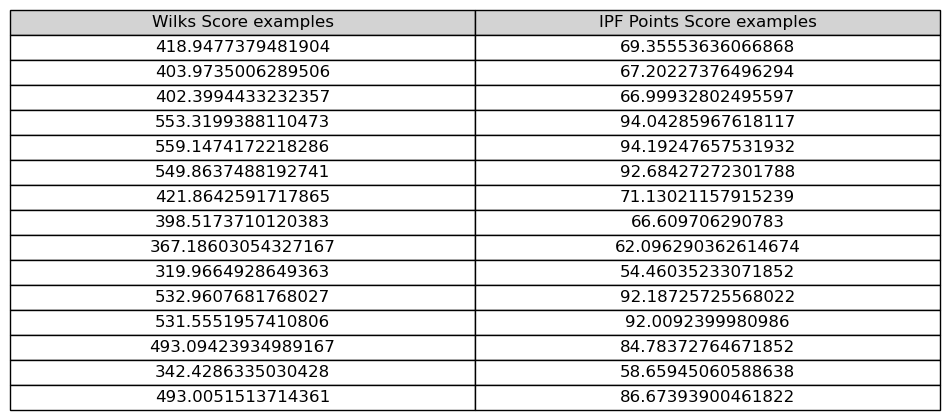

In [20]:
current_dataframe = pd.read_csv("./wilks_ipf_updated_dataset.csv")

data = []
random_number = random.randint(0, len(current_dataframe))

#Loop through 15 random entries from each column and store these entries in an array
for i in range(15):
    wilks_values = current_dataframe['wilks_score'].iloc[random_number+i]
    ipf_points_values = current_dataframe['ipf_points_score'].iloc[random_number+i]
    
    data.append([wilks_values, ipf_points_values])


#Create column labels for the table
columns = ['Wilks Score examples', 'IPF Points Score examples']


fig, ax = plt.subplots(figsize=(4, 4))

#Creating the table, passing in the entries tat are stored in the 'data' array and the column headings
table = ax.table(cellText=data, colLabels=columns, loc='center', cellLoc='center', colColours=['lightgray'] * len(columns))


table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 1.5)
ax.axis('off')
plt.show()


(6) The cell below computes the correlation between the two previously engineered columns, the wilks score and the IPF points score. Three different correlation metrics were used to illustrate the correlation between the two new features. Namely, the Pearson correlation, Spearman correlation and Kendall correlation. 

As can be seen from the table of correlation results below, the two columns, wilks score and IPF points score, are highly correlated. This is expected as both these metrics calculate the relative performance of a lifter at a certain meet and allows for lifters of different gender and weightclass to be compared. Therefore they are achieveing the same purpose but calculated differently. 

(0.0, 1.0, 0.0, 1.0)

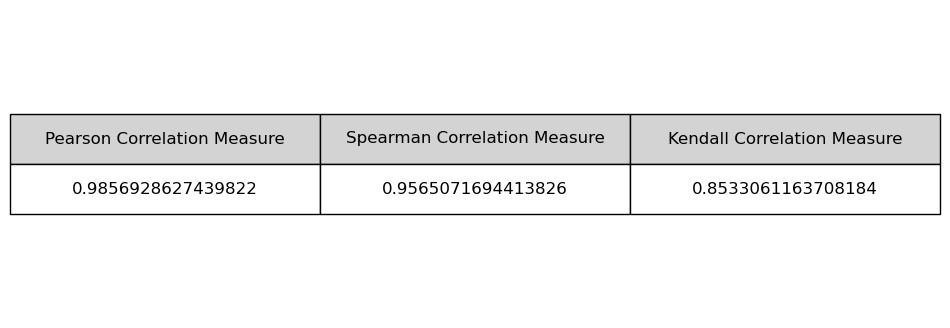

In [16]:
#Computing correlation between these columns

#Using Pearson’s correlation coefficient
correlation_pearson = current_dataframe['wilks_score'].corr(current_dataframe['ipf_points_score'],'pearson')

#Using Spearman's correlation coefficient
correlation_spearman = current_dataframe['wilks_score'].corr(current_dataframe['ipf_points_score'],'spearman')

#Using Kendall’s correlation coefficient
correlation_kendall = current_dataframe['wilks_score'].corr(current_dataframe['ipf_points_score'],'kendall')


columns = ('Pearson Correlation Measure', 'Spearman Correlation Measure', 'Kendall Correlation Measure')
cells = [[correlation_pearson, correlation_spearman, correlation_kendall]]

fig, ax = plt.subplots(figsize=(4, 4))


table = ax.table(cellText=cells, colLabels=columns, loc='center', cellLoc='center', colColours=['lightgray'] * len(columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 3)
ax.axis('off')


(7) The following two cells compute various descriptive statistic measures for the two newly engineered features, the wilks score and the IPF points score

In [38]:
#Stats for wilks score column

mean_w = current_dataframe['wilks_score'].mean()
median_w = current_dataframe['wilks_score'].median()
mode_w = current_dataframe['wilks_score'].mode()
variance_w = current_dataframe['wilks_score'].var()
standard_dev_w = current_dataframe['wilks_score'].std()

#Computes range
range_dataset_w = current_dataframe['wilks_score'].max() -  current_dataframe['wilks_score'].min()

#Computes the quantiles which can then be used to calculate the inter quartile ranges
Q1_w = current_dataframe['wilks_score'].quantile(0.25)
Q2_w = current_dataframe['wilks_score'].quantile(0.50)
Q3_w = current_dataframe['wilks_score'].quantile(0.75)
Q4_w = current_dataframe['wilks_score'].quantile(1.0)
percentile_90_w = current_dataframe['wilks_score'].quantile(0.90)
percentile_70_w = current_dataframe['wilks_score'].quantile(0.70)
percentile_30_w = current_dataframe['wilks_score'].quantile(0.30)
percentile_10_w = current_dataframe['wilks_score'].quantile(0.10)


In [39]:
#Stats for the IPF Points score

mean_ipf = current_dataframe['ipf_points_score'].mean()
median_ipf = current_dataframe['ipf_points_score'].median()
mode_ipf = current_dataframe['ipf_points_score'].mode()
variance_ipf = current_dataframe['ipf_points_score'].var()
standard_dev_ipf = current_dataframe['ipf_points_score'].std()

#Computes the range
range_dataset_ipf = current_dataframe['ipf_points_score'].max() -  current_dataframe['ipf_points_score'].min()

#Computes the quantiles which can then be used to calculate the inter quartile ranges
Q1_ipf = current_dataframe['ipf_points_score'].quantile(0.25)
Q2_ipf = current_dataframe['ipf_points_score'].quantile(0.50)
Q3_ipf = current_dataframe['ipf_points_score'].quantile(0.75)
Q4_ipf = current_dataframe['ipf_points_score'].quantile(1.0)
percentile_90_ipf = current_dataframe['ipf_points_score'].quantile(0.90)
percentile_70_ipf = current_dataframe['ipf_points_score'].quantile(0.70)
percentile_30_ipf = current_dataframe['ipf_points_score'].quantile(0.30)
percentile_10_ipf = current_dataframe['ipf_points_score'].quantile(0.10)

The cell below combines all the statistical measures and displays them in a table

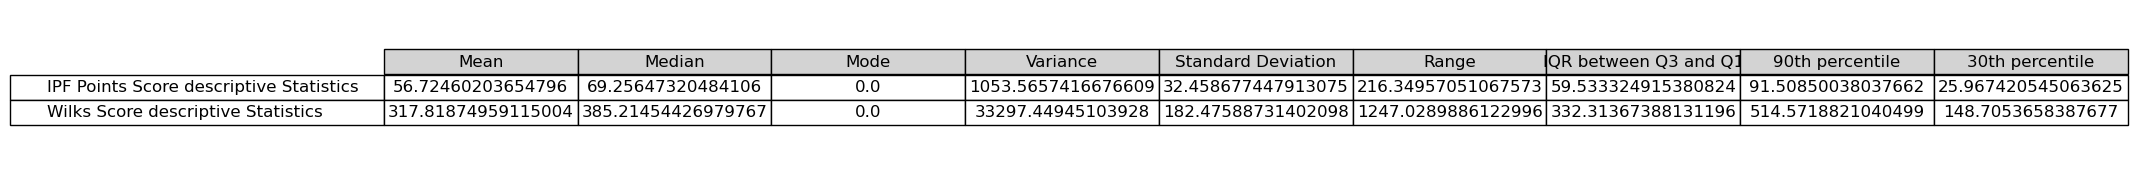

In [66]:

data = [[mean_ipf, median_ipf, mode_ipf[0], variance_ipf, standard_dev_ipf, range_dataset_ipf, Q3_ipf - Q1_ipf, percentile_90_ipf, percentile_30_ipf],
        [mean_w, median_w, mode_w[0], variance_w, standard_dev_w, range_dataset_w, Q3_w - Q1_w, percentile_90_w, percentile_30_w]]

columns = ('Mean', 'Median', 'Mode', 'Variance', 'Standard Deviation', 'Range', 'IQR between Q3 and Q1', '90th percentile', '30th percentile')
rows = ['IPF Points Score descriptive Statistics','Wilks Score descriptive Statistics']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7.5, 2))

# Create a table
table = ax.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center', cellLoc='center', colColours=['lightgray'] * len(columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 1.5)

# Remove axis
ax.axis('off')

# Show the table
plt.show()

### (8) Performing the same analysis as the above but now with a single perfromance per lifter

A dataset is created of one performance per lifter by removing the repeated names of the lifters. Therefore the first performance that appears in the dataset for each lifter is the one chosen to remain in this subset of that data

In [2]:
#read in same csv that was created previously where the wilks score and IPF points are already calculated
df_current = pd.read_csv("./wilks_ipf_updated_dataset.csv")

#Now filter to a single performance for each lifter
#Removing the duplicate names and therefore only keeping one performance per lifter
unique_df = df_current.drop_duplicates(subset='Name')

unique_df.to_csv("single_performance.csv")


C:\Users\DELL\AppData\Local\Temp\ipykernel_24228\4155452387.py:2: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_current = pd.read_csv("./wilks_ipf_updated_dataset.csv")


The cell below randomly samples 15 datapoints from these two columns within the dataset

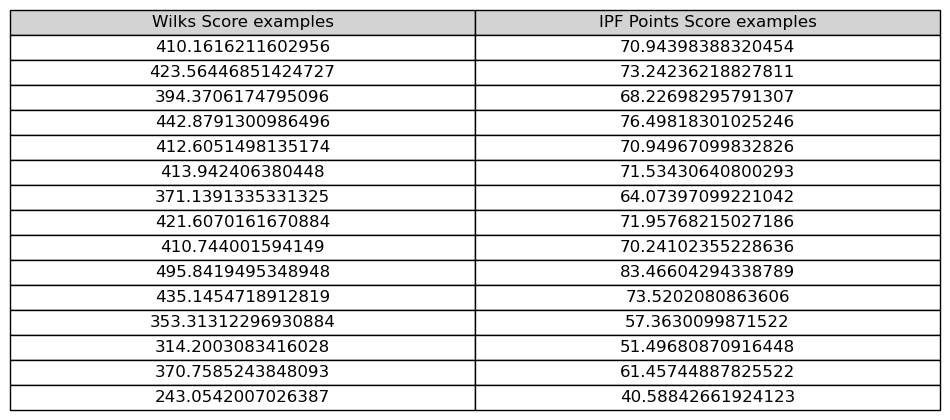

In [11]:
df_single = pd.read_csv("./single_performance.csv")

data = []
random_number = random.randint(0, len(df_single))
for i in range(15):
    wilks_values = df_single['wilks_score'].iloc[random_number+i]
    ipf_points_values = df_single['ipf_points_score'].iloc[random_number+i]
    
    data.append([wilks_values, ipf_points_values])



columns = ['Wilks Score examples', 'IPF Points Score examples']


fig, ax = plt.subplots(figsize=(4, 4))


table = ax.table(cellText=data, colLabels=columns, loc='center', cellLoc='center', colColours=['lightgray'] * len(columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 1.5)
ax.axis('off')
plt.show()


As before, the correlation between these two features is high. This is again expected as these two scores are created in order to perform the same function, of comparing the relative lifting perfromance of various different lifters. It makes intuitive sense for them to be highly correlated

(0.0, 1.0, 0.0, 1.0)

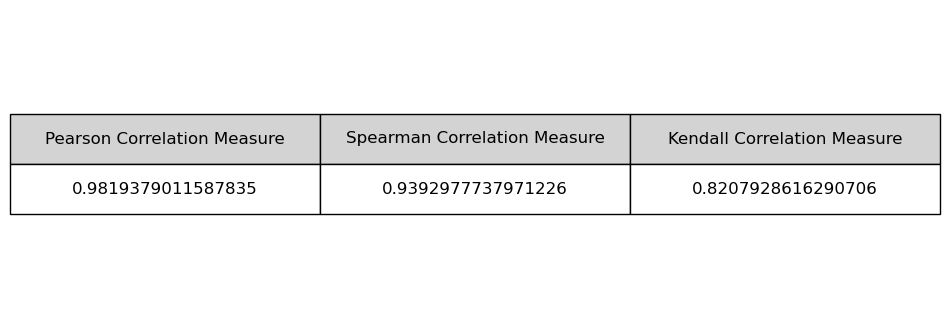

In [12]:
#Computing correlation between these columns

#Using Pearson’s correlation coefficient
correlation_pearson = df_single['wilks_score'].corr(df_single['ipf_points_score'],'pearson')

#Using Spearman's correlation coefficient
correlation_spearman = df_single['wilks_score'].corr(df_single['ipf_points_score'],'spearman')

#Using Kendall’s correlation coefficient
correlation_kendall = df_single['wilks_score'].corr(df_single['ipf_points_score'],'kendall')


columns = ('Pearson Correlation Measure', 'Spearman Correlation Measure', 'Kendall Correlation Measure')
cells = [[correlation_pearson, correlation_spearman, correlation_kendall]]

fig, ax = plt.subplots(figsize=(4, 4))


table = ax.table(cellText=cells, colLabels=columns, loc='center', cellLoc='center', colColours=['lightgray'] * len(columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 3)
ax.axis('off')


Computing various descriptive statistics for the two columns

In [13]:
#Stats for wilks score column

mean_w_r = df_single['wilks_score'].mean()
median_w_r = df_single['wilks_score'].median()
mode_w_r = df_single['wilks_score'].mode()
variance_w_r = df_single['wilks_score'].var()
standard_dev_w_r = df_single['wilks_score'].std()

#computes the range
range_dataset_w_r = df_single['wilks_score'].max() - df_single['wilks_score'].min()


#Computes the quantiles which can then be used to calculate the inter quartile ranges
Q1_w_r = df_single['wilks_score'].quantile(0.25)
Q2_w_r = df_single['wilks_score'].quantile(0.50)
Q3_w_r = df_single['wilks_score'].quantile(0.75)
Q4_w_r = df_single['wilks_score'].quantile(1.0)
percentile_90_w_r = df_single['wilks_score'].quantile(0.90)
percentile_30_w_r = df_single['wilks_score'].quantile(0.30)



In [14]:
#Stats for wilks score column

mean_ipf_r = df_single['ipf_points_score'].mean()
median_ipf_r = df_single['ipf_points_score'].median()
mode_ipf_r = df_single['ipf_points_score'].mode()
variance_ipf_r = df_single['ipf_points_score'].var()
standard_dev_ipf_r = df_single['ipf_points_score'].std()

#Computes the range
range_dataset_ipf_r = df_single['ipf_points_score'].max() - df_single['ipf_points_score'].min()


#Computes the quantiles which can then be used to calculate the inter quartile ranges
Q1_ipf_r = df_single['ipf_points_score'].quantile(0.25)
Q2_ipf_r = df_single['ipf_points_score'].quantile(0.50)
Q3_ipf_r = df_single['ipf_points_score'].quantile(0.75)
Q4_ipf_r = df_single['ipf_points_score'].quantile(1.0)
percentile_90_ipf_r = df_single['ipf_points_score'].quantile(0.90)
percentile_30_ipf_r = df_single['ipf_points_score'].quantile(0.30)



Creating a table to display the various descriptive statistics

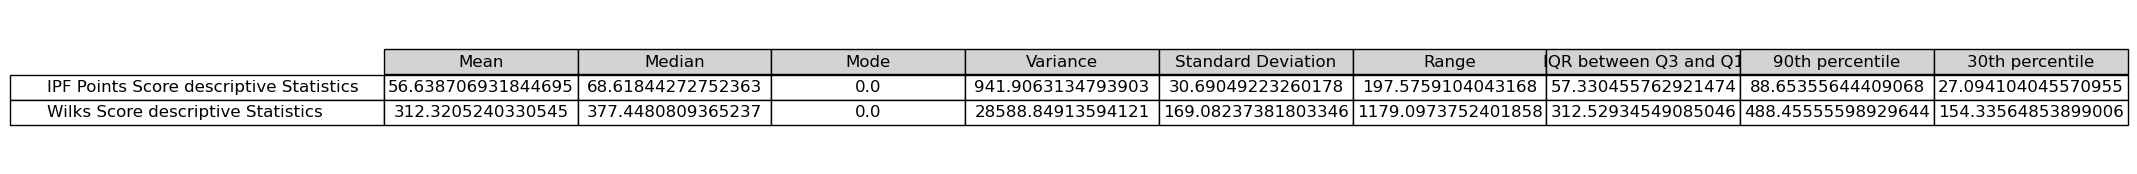

In [15]:

data = [[mean_ipf_r, median_ipf_r, mode_ipf_r[0], variance_ipf_r, standard_dev_ipf_r, range_dataset_ipf_r, Q3_ipf_r - Q1_ipf_r, percentile_90_ipf_r, percentile_30_ipf_r],
        [mean_w_r, median_w_r, mode_w_r[0], variance_w_r, standard_dev_w_r, range_dataset_w_r, Q3_w_r - Q1_w_r, percentile_90_w_r, percentile_30_w_r]]

columns = ('Mean', 'Median', 'Mode', 'Variance', 'Standard Deviation', 'Range', 'IQR between Q3 and Q1', '90th percentile', '30th percentile')
rows = ['IPF Points Score descriptive Statistics','Wilks Score descriptive Statistics']


fig, ax = plt.subplots(figsize=(7.5, 2))


table = ax.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center', cellLoc='center', colColours=['lightgray'] * len(columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 1.5)
ax.axis('off')
plt.show()

With reference to the above two analyses: 

The initial analysis was performed on a dataset that contained multiple different performances for a single lifter. These multiple performances exist as the dataset contains various competitions spanning a few years. Two new features were created, a feature that represented the wilks score and a feature that represented an IPF points score, for every performance. It was seen that these columns were highly correlated, this is due to multiple factors. They are highly correlated as they are both calculated to perform the same purpose, that of comparing the performance of lifters of different gender and weight class. Another reason they are highly correlated is due to the way they are calculated. They are calculated differently but both use a lifters gender, bodyweight and total amount lifted as metrics and therefore they both take into account a lifters features like gender and bodyweight. Subsequently, various descriptive statistics were calculated, for example the mean, median, mode, variance and standard deviation. It can be noted that for these two columns the mode is 0. This is due to missing information resulting in the inability to calculate the wilks score and IPF points score. 

The secondary analysis was peformed on a subset of the dataset used in the first analysis. This subset was created by filtering out the multiple performances of each lifter. This  additonal analysis was performed as the multiple performances for each lifter is likely to be self-similar and therefore an unnecessary inclsuion. In theory it should be possible to arrive at similar results if multiple different performances of the same lifter is filtered out. This statement was found to be true. The same analysis was performed and based off the correlation and descriptive statistic results found, it can be seen that these results are very similar to the results obtained in the first analysis.



(9) The lifters bodyweights are plotted using various graphs. It was decided to split the lifters by gender and plot their respective weights to allow for further analysis The analysis of the plots is given after all plots are shown.

In [17]:
#Reading in the dataset to be used to plot the bodyweights, the correlograms and find repeated names
df = pd.read_csv("./wilks_ipf_updated_dataset.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_24228\4092884994.py:2: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./wilks_ipf_updated_dataset.csv")


Histogram

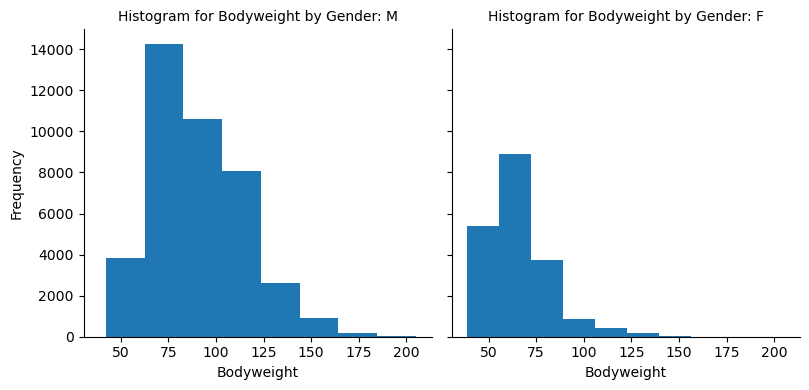

In [19]:
#Plotting a Histogram
g = sns.FacetGrid(data=df, col='Sex', height=4)
g.map(plt.hist, 'BodyweightKg', bins=8)


g.set_axis_labels('Bodyweight', 'Frequency')
g.set_titles('Histogram for Bodyweight by Gender: {col_name}')


plt.show()

KDE plot

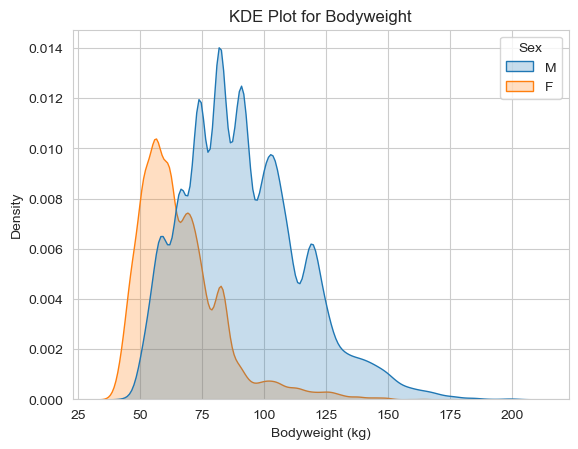

In [20]:
sns.set_style('whitegrid') 
sns.kdeplot(data=df,x='BodyweightKg',hue='Sex', fill=True,color='red')

plt.xlabel('Bodyweight (kg)')
plt.ylabel('Density')
plt.title('KDE Plot for Bodyweight')


plt.show()

Violin Plot

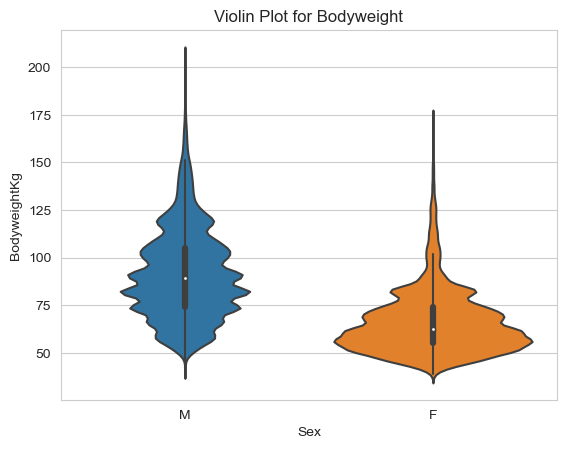

In [21]:
sns.violinplot(x='Sex',y='BodyweightKg', data=df)
plt.title('Violin Plot for Bodyweight')
plt.show()

Box PLot

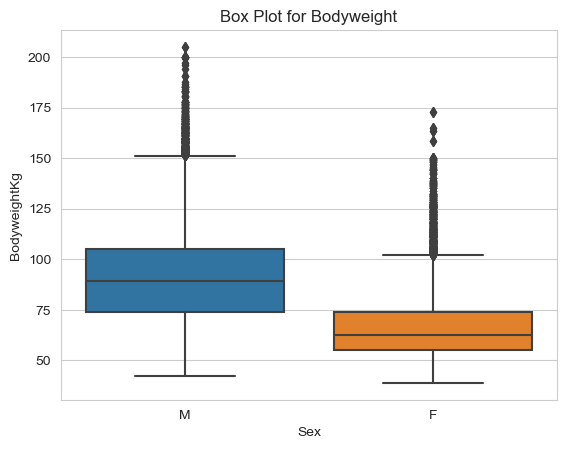

In [22]:
sns.boxplot(x='Sex',y='BodyweightKg', data=df)
plt.title('Box Plot for Bodyweight')
plt.show()

Scatter Plot

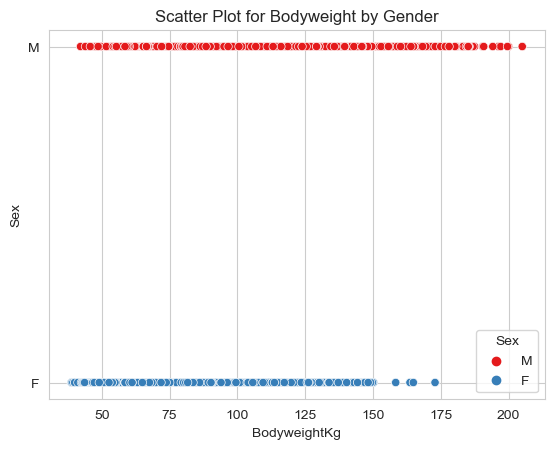

In [23]:
sns.scatterplot(data=df, x='BodyweightKg', y='Sex', hue='Sex', palette='Set1')
plt.title('Scatter Plot for Bodyweight by Gender')
plt.show()

Plot analysis: It can be seen that overall the bodyweight for males is higher than for females. It can also be seen that the number of male lifters is higher than the number of female lifters. It can also be seen that most frequent range of bodyweights is between 70 and 100 for men and 40 and 75 for women. This is likely the case as weighing within this range is the optimal weight for powerlifting, for the resepective genders, and the most popular category to compete in.

(10) The following are various correlograms or correlation matrices. All the correlation matrices are meausred between the bodyweight, squat, benchpress and deadlift features. The various correlation matrices vary depending on the filter applied, they are filtered based on gender and equipment used. The analysis of the results will appear after all the plots

Correlation matrix of bodyweight, squat, benchpress and deadlift features filtered for females using raw equipment style

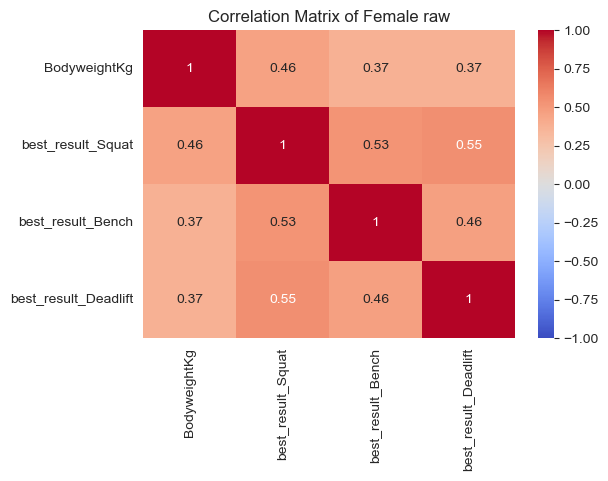

In [26]:

columns_to_include = ['BodyweightKg', 'best_result_Squat','best_result_Bench','best_result_Deadlift']

#Filter the dataframe based on gender and equipment
filtered_df = df[(df['Sex'] == 'F') & (df['Equipment'] == 'Raw')]

#Create filtered dataframe with the features to perform the correlation between
selected_df = filtered_df[columns_to_include]

#Computing the correlation values between the features
correlation_matrix = selected_df.corr()

#Using a heatmap to display the various correlation values
plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Female raw')
plt.show()


Correlation matrix of bodyweight, squat, benchpress and deadlift features filtered for females using single-ply equipment style

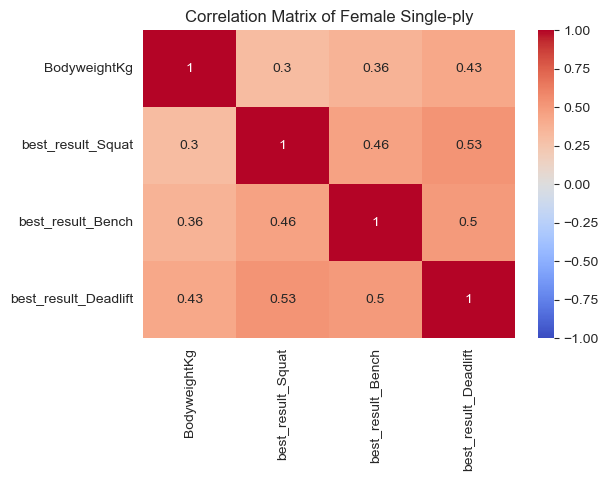

In [25]:

columns_to_include = ['BodyweightKg', 'best_result_Squat','best_result_Bench','best_result_Deadlift']


filtered_df = df[(df['Sex'] == 'F') & (df['Equipment'] == 'Single-ply')]

selected_df = filtered_df[columns_to_include]

correlation_matrix = selected_df.corr()


plt.figure(figsize=(6, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Female Single-ply')
plt.show()


Correlation matrix of bodyweight, squat, benchpress and deadlift features filtered for males using raw equipment style

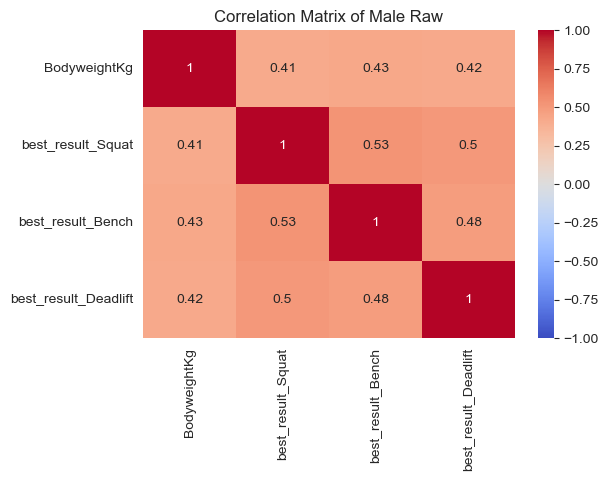

In [27]:

columns_to_include = ['BodyweightKg', 'best_result_Squat','best_result_Bench','best_result_Deadlift']

filtered_df = df[(df['Sex'] == 'M') & (df['Equipment'] == 'Raw')]

selected_df = filtered_df[columns_to_include]

correlation_matrix = selected_df.corr()


plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Male Raw')
plt.show()


Correlation matrix of bodyweight, squat, benchpress and deadlift features filtered for males using single-ply equipment style

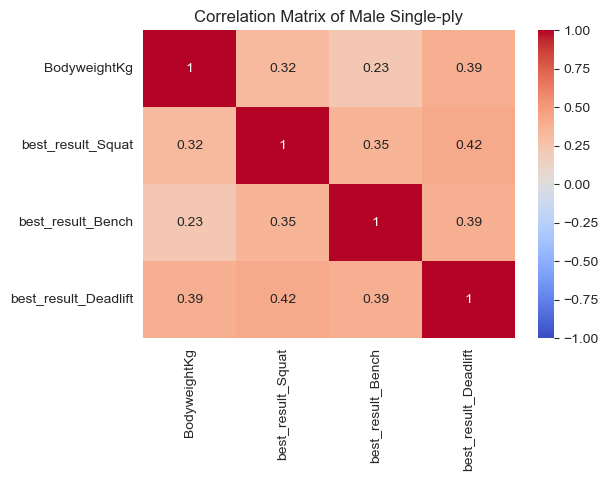

In [28]:

columns_to_include = ['BodyweightKg', 'best_result_Squat','best_result_Bench','best_result_Deadlift']

filtered_df = df[(df['Sex'] == 'M') & (df['Equipment'] == 'Single-ply')]

selected_df = filtered_df[columns_to_include]

correlation_matrix = selected_df.corr()


plt.figure(figsize=(6, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Male Single-ply')
plt.show()


Correlation Matrix analysis: For all the correlaton matrices presented above, the three lifts, squat, bench press and deadlift, are all more correlated to each other than they are to bodyweight. Bodyweight always has the lowest correlation result, for a certain lift, against all the other lifts. This can be due to the strength of the lifters regardless of how large their bodyweight is. Professional powerlifters are able to lift extremely heavy weight without having to have an extremely large bodyweight, their relative strength is extremely high. This is evident in the above as bodyweight and all three lifts are weakly correlated, therefore it does not mean that as their bodyweight increases so will their lifts. 

In addition, each lifter's lifts are moderately correlated. This is expected, as it might be the case that they excelled in one of the lifts at a meet but did not lift well in the others. It is not always expected that they perform well in the squat and then well again in the bench press or the deadlift. This can be done and that is why there was a moderate correlation between the lifts and not a high correlation.

(11) Finding lifters listed in the dataset under different names


The first lifter is Alan Vith. He is listed multiple times under different names. The different names stem from either an incorrect spelling or the addition of a double-barrel name or middle name. It is the same lifter as all the lifters under this name are born in the same year, compete either in the same weightclass or a very similar one, have very similar bodyweights, are from the same country and the various lifting weights are very close together

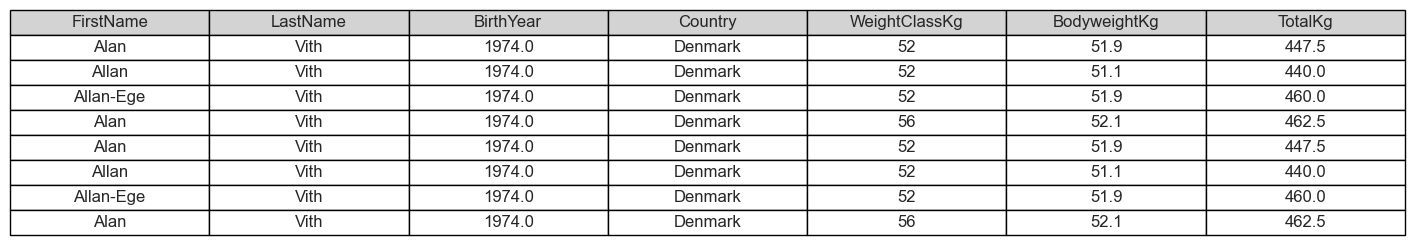

In [40]:
df[['FirstName', 'LastName']] = df['Name'].str.split(' ', n=1, expand=True)

check_surname_df = df[df['LastName'] == 'Vith']

display_df = check_surname_df[['FirstName', 'LastName','BirthYear','Country','WeightClassKg', 'BodyweightKg','TotalKg']]


fig, ax = plt.subplots(figsize=(6, 2))
table = ax.table(cellText=display_df.values,colLabels=display_df.columns,loc='center',cellLoc='center',colColours=['lightgray'] * len(check_surname_df.columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 1.5)
ax.axis('off')
plt.show()

The second lifter is Riitt Liimatainen. He is listed multiple times under different names. The different names stem from either an incorrect spelling or the addition of a middle name. It is the same lifter as all the lifters under this name are born in the same year, compete either in the same weightclass or a very similar one, have very similar bodyweights, are from the same country and the various lifting weights are very close together

In [48]:
df[['FirstName', 'LastName']] = df['Name'].str.split(' ', n=1, expand=True)

filtered_rows_name = df[(df['LastName'] == 'Liimatainen') & (~df['FirstName'].isin(['Antti', 'Joanna', 'Johan','Miia']))]

display_df_1 = filtered_rows_name[['FirstName','MiddleName', 'LastName','BirthYear','Country','WeightClassKg', 'BodyweightKg','TotalKg']]

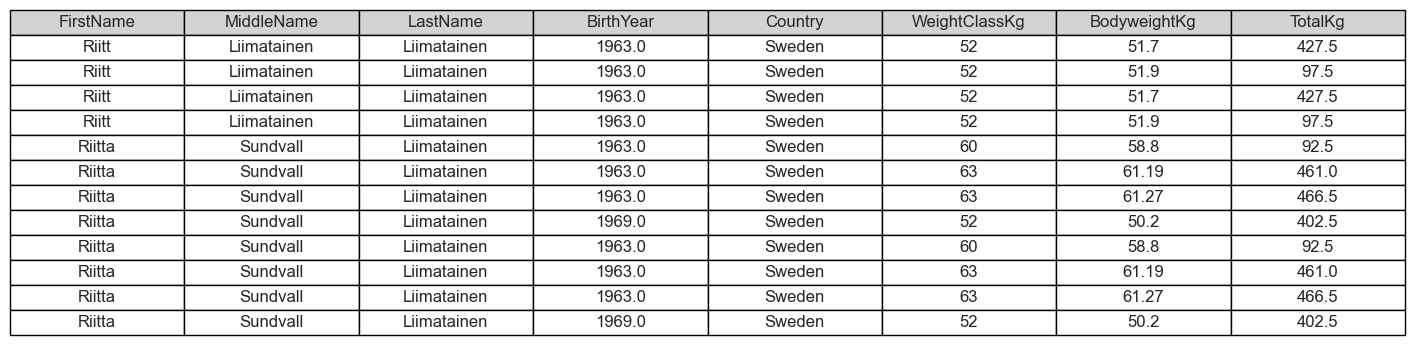

In [49]:
df[['FirstName','MiddleName', 'LastName']] = df['Name'].str.split(' ', n=2, expand=True)
filtered_rows_name = df[(df['LastName'] == 'Liimatainen') & (~df['FirstName'].isin(['Antti', 'Joanna', 'Johan','Miia']))]

display_df_2 = filtered_rows_name[['FirstName','MiddleName', 'LastName','BirthYear','Country','WeightClassKg', 'BodyweightKg','TotalKg']]

combine_dataframes = []
#Add to list of dataframes
combine_dataframes.append(display_df_1)
combine_dataframes.append(display_df_2)

#Combine the two dataframes into one
#This dataframe contains all meet data from both federations
combined_total = pd.concat(combine_dataframes, ignore_index=True)


fig, ax = plt.subplots(figsize=(6, 2))
table = ax.table(cellText=combined_total.values,colLabels=combined_total.columns,loc='center',cellLoc='center',colColours=['lightgray'] * len(check_surname_df.columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 1.5)
ax.axis('off')
plt.show()